This project is an application of Machine Learning Algorithm in classification.
Specifically we will be using "Unspervised" Machine Learning approach to classify Iris Flower into clusters.
KMeans Algorithm is utilized.

In [1]:
#We import all the necessary libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
# Now we load the data set for the iris flower. 
# you can load from the existing sklearn data sets

from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
#Let us see the features of this dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
#Now we get our dataframe by this:
df_raw = pd.DataFrame(iris.data, columns=iris.feature_names)
df_raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_raw.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

KMeans Clustering is an unsupervised ML algorithm hence we are going to drop some of the columns that will not be relevant in this modeling

In [7]:
df=df_raw.drop(['sepal length (cm)','sepal width (cm)'], axis='columns')

In [8]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width (cm)')

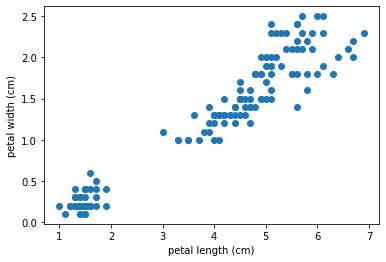

In [9]:
#let's have a scatter plot of the dataset
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Great! we now have to go into KMeans Algorithm. 
We need to know the optimal number of K that will give the right number of clusters
This can only be achieved by using the Elbow Technique

In [11]:
#let's take a range of k, say between 1 and 20
k_range=range(1,20)
SSE = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    SSE.append(km.inertia_)

In [12]:
#taking a look at the Sum of the Squared Errors
SSE

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.137740781246041,
 9.19386673204751,
 7.67314034019405,
 6.55648629148629,
 5.651905145721001,
 5.1237396867838,
 4.695130980130979,
 4.385017704517702,
 3.960466780200476,
 3.6240305135181297,
 3.402218687929355,
 3.082004561746497,
 2.863786381350958,
 2.6233150134889267]

Text(0, 0.5, 'SSE')

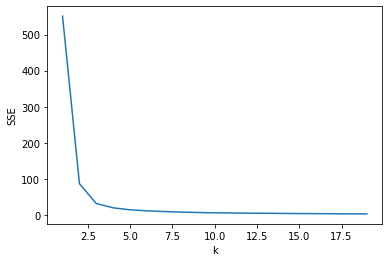

In [14]:
#we visualized to see the elbow
plt.plot(k_range, SSE)
plt.xlabel('k')
plt.ylabel('SSE')

Text(0, 0.5, 'SSE')

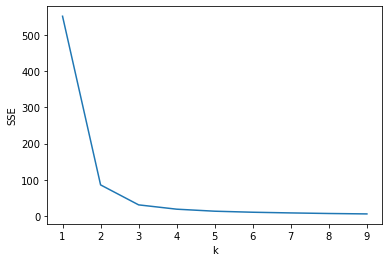

In [15]:
# great! supposing we make the range to be (1-10), clearly the elbow is at 3
k_range=range(1,10)
SSE = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    SSE.append(km.inertia_)

plt.plot(k_range, SSE)
plt.xlabel('k')
plt.ylabel('SSE')

In [16]:
#so we will use n_clusters=3 in our KMeans
km =KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [17]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#We will add a column of the prediction to our dataframe
df['cluster']=y_predicted
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [19]:
df['cluster'].unique()

array([1, 0, 2])

In [20]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

#We recreated a dataframe for each of the clusters so that we be able to visualize them on a scatter plot

In [21]:
 #we will include the centriods too in the scatter plot because they serve as the centre of gravity for each of the clusters
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

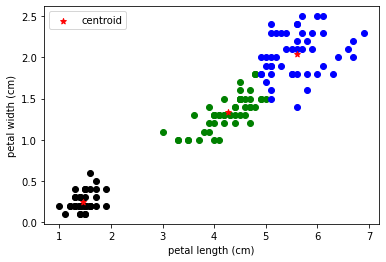

In [23]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='black')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='*',label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

Viola! according to this model, there are three classes or categories of the Iris flower

Let's take a step further to scale the data to see if there will be any difference. 
We use MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler= MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['scaledPL']= scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['scaledWL']= scaler.transform(df[['petal width (cm)']])

df

,petal length (cm),petal width (cm),cluster,scaledPL,scaledWL
0,1.4,0.2,1,0.067797,0.041667
1,1.4,0.2,1,0.067797,0.041667
2,1.3,0.2,1,0.050847,0.041667
3,1.5,0.2,1,0.084746,0.041667
4,1.4,0.2,1,0.067797,0.041667
...,...,...,...,...,...
145,5.2,2.3,2,0.711864,0.916667
146,5.0,1.9,2,0.677966,0.750000
147,5.2,2.0,2,0.711864,0.791667
148,5.4,2.3,2,0.745763,0.916667


In [27]:
km = KMeans(n_clusters=3)
yp=km.fit_predict(df[['scaledPL','scaledWL']])
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
df['scaledcluster']= yp
df.head()

,petal length (cm),petal width (cm),cluster,scaledPL,scaledWL,scaledcluster
0,1.4,0.2,1,0.067797,0.041667,0
1,1.4,0.2,1,0.067797,0.041667,0
2,1.3,0.2,1,0.050847,0.041667,0
3,1.5,0.2,1,0.084746,0.041667,0
4,1.4,0.2,1,0.067797,0.041667,0


In [29]:
sdf1=df[df.scaledcluster==0]
sdf2=df[df.scaledcluster==1]
sdf3=df[df.scaledcluster==2]

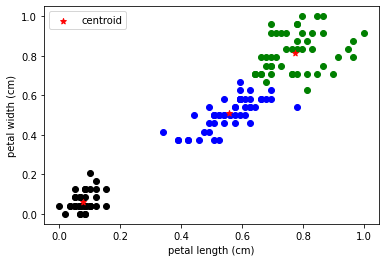

In [30]:
plt.scatter(sdf1['scaledPL'],sdf1['scaledWL'], color='black')
plt.scatter(sdf2['scaledPL'],sdf2['scaledWL'], color='green')
plt.scatter(sdf3['scaledPL'],sdf3['scaledWL'], color='blue')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='*',label='centroid')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

Great! we have the same results upon scaling. scaling becomes necesaary to normalized the data in the case when there is huge gap between each of the features

A big thank you to my coach and tutor Patel
You can subscribe to his youtube channel codebasics